# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from functions_iterative import itr_control, Reservoir

In [3]:
%load_ext line_profiler

In [4]:
%matplotlib widget

# Données d'entrées

In [5]:
S = 52
NTrain = 10
H = 168

In [6]:
# study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/ERAA_scandinavie"
# output_path = study_path+"/user/fast_fi00"
study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/OneNodeBase"
output_path = study_path+"/user"

In [7]:
# pen_low = 10000
# pen_high = 0
# pen_final = 10000
pen_low = 3
pen_high = 3
pen_final = 3

In [8]:
# reservoir = Reservoir(5530000,1,study_path,"fi00","reservoir")
reservoir = Reservoir(1e7,1,study_path,"area","reservoir", final_level=True)

In [10]:
xNsteps = 20
X = np.linspace(0, reservoir.capacity, num = xNsteps)

# Run

In [11]:
vb, G, itr, temps_tot, U, control_basis, controls_upper, traj = itr_control(reservoir, output_path, pen_low, pen_high, X,3, pen_final, 1e-4,S=S,H=H,NTrain=NTrain) 

3050474.360083297 44946816.29601796 41896341.93593466
384749.5110703856 44454682.94655631 44069933.43548592
5826.1042663529515 44209139.138693325 44203313.03442697


## Performances

In [12]:
[np.sum(itr[i,:,:,2]) for i in range(0,len(itr))]

[14.764748334884644,
 5.163131475448608,
 10.778738737106323,
 6.3213019371032715,
 8.421281099319458,
 4.460665464401245]

In [13]:
[np.mean(itr[i,:,:,0]) for i in range(0,len(itr))]

[248.49423076923077,
 118.40576923076924,
 256.3942307692308,
 91.67692307692307,
 157.1076923076923,
 86.16538461538461]

In [14]:
temps_tot

[43.10908603668213, 32.58075213432312, 34.59544658660889, 27.487449645996094]

In [15]:
sum(temps_tot[1:])

94.6636483669281

# Results

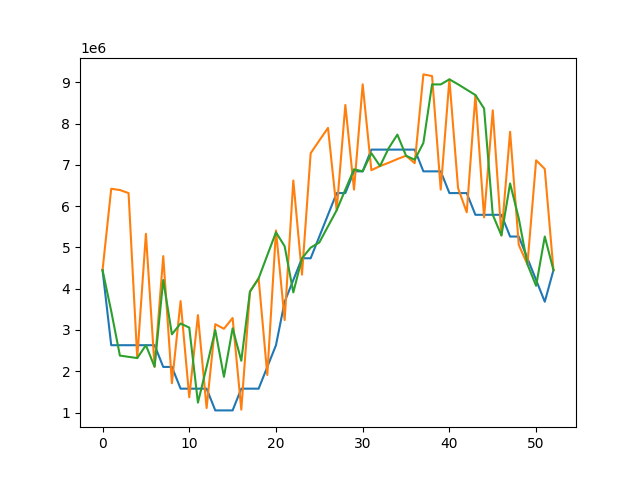

In [16]:
plt.figure()
j = 0
for i in range(len(traj)):
    plt.plot(traj[i][:,j])


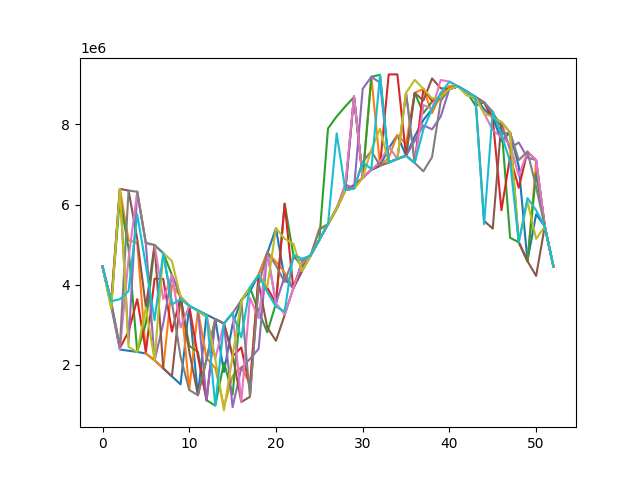

In [14]:
plt.figure()
plt.plot(traj[-1])

In [20]:
penalties = np.zeros((xNsteps, S+1))
for s in range(S+1):
    pen = interp1d([0,reservoir.Xmin[s],reservoir.Xmax[s],reservoir.capacity],[-pen_low*(reservoir.Xmin[s]),0,0,-pen_high*(reservoir.capacity-reservoir.Xmax[s])])
    for i in range(xNsteps):
        penalties[i,s] = pen(X[i])

In [21]:
s = 50
i = np.argmax([X>=reservoir.Xmin[s]])
j = np.argmin([X<=reservoir.Xmax[s]])
# i = 0
# j = xNsteps

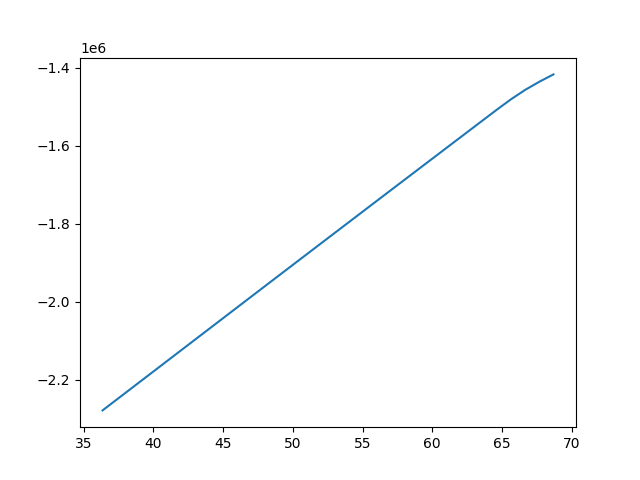

In [22]:
plt.figure()
plt.plot(X[i:j]/reservoir.capacity*100,vb[i:j,s])#-penalties[i:j,s]

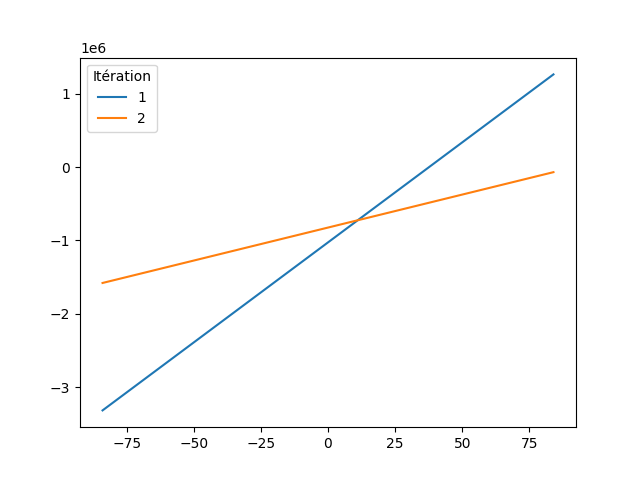

In [23]:
plt.figure()
for k in range(1,len(G[s][0])):
    g = G[s][0][k][0]*np.array(U[s][0])+G[s][0][k][1]
    plt.plot(np.array(U[s][0])/reservoir.capacity*100,g,label=f"{k}")#-penalties[i:j,s]
plt.legend(title="Itération")

In [24]:
trajectoires = np.zeros_like(np.array(controls_upper))
for i in range(len(controls_upper)):
    for s in range(S):
        for k in range(NTrain):
            if s==0:
                trajectoires[i,s,k] = reservoir.initial_level - np.array(controls_upper)[i,s,k]+reservoir.inflow[s,k]*H
            else :
                trajectoires[i,s,k] = trajectoires[i,s-1,k] - np.array(controls_upper)[i,s,k]+reservoir.inflow[s,k]*H

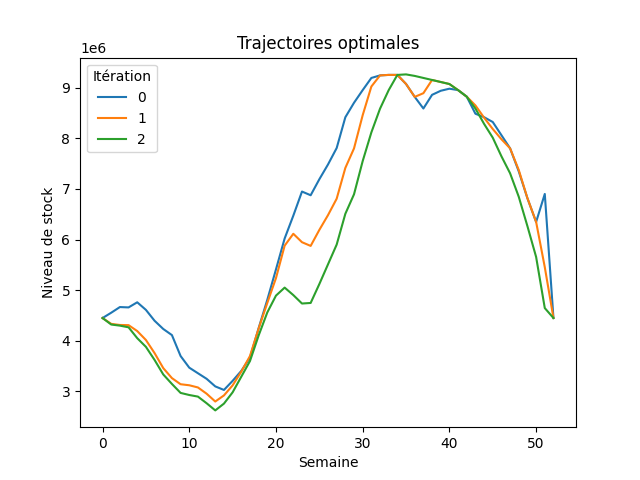

In [25]:
k = 0
plt.figure()
plt.title("Trajectoires optimales")
plt.xlabel("Semaine")
plt.ylabel("Niveau de stock")
for i in range(len(trajectoires)):
    plt.plot([reservoir.initial_level]+list(trajectoires[i,:,k]),label=f"{i}")
plt.legend(title="Itération")